 # ESTADÍSTICA 2.  PRÁCTICA 4.
 ## Autor: Jesús Octavio Raboso.
 
Los enunciados del ejercicio aparecerán en negrita, cursiva y color azul. El resto de anotaciones (explicativas y personales) no seguirán ese estilo.

<font color='red'>**Suelo trabajar en local. Es posible que las últimas celdas relativas a la función `comparison()` no puedan verse si el cuaderno es ejecutado en https://datasciencehub.ifca.es/  ya que (creo) no tiene instalado el paquete *ggpubr*.**</font>

<font color='red'>**Por tanto, este notebook es enviado junto a un documento html *`Ejercicio_4.html`* para que puedan verse las imagenes (en caso de no poder ejecutarse correctamente en el datascienchub)**</font>

<font color='blue'>***1.- Crea una función que genere dos muestras que se distribuyen según dos gaussianas distintas. La función recibirá como valores de entrada: el número N de puntos a generar para cada categoría, y mu1, sigma1, mu2, sigma2 que son los correspondientes parámetros de las dos gaussianas. Como output devolverá un valor con longitud 2N que contenga la muestra x generada, y otro vector de longitud 2N que contenga 0 o 1 en función de la categoría asociada a ese elemento.***</font>

In [1]:
my_dist <- function(N, mu_1, mu_2, sigma_1, sigma_2){
    
    #
    # Creates required distributions and associated categories.
    # Sample 1: normally distributed (mean = mu_1, sd = sigma_1)
    #           associated with category 0
    # Sample 2: normally distributed (mean = mu_2, sd = sigma_2)
    #           associated with category 1  
    #
    # @description Desired model.
    #
    # @param N int > 0: sample size 
    # @param mu_1 float: population mean for first distribution
    # @param mu_2 float: population mean for second distribution
    # @param sigma_1 float: standard deviation for first distribution
    # @param sigma_2 float: standad deviation for second distribution
    #
    # @return data.frame: (2*N x 2) data frame whose rows are the realizations; whose 1st column
    # values are the observed sample; whose 2nd column values are the categories
    # 
    
    # Generates random samples.
    # sample_1 is associated with category 0.
    # sample_2 is associated with category 1.
    # Uses cbind to create a two-column  array for each observation
    # first column: realizations; second column: category
    sample_1 <- cbind(rnorm(N, mean = mu_1, sd = sigma_1), 0) # sample_1 points are in category 0
    sample_2 <- cbind(rnorm(N, mean = mu_2, sd = sigma_2), 1) # sample_2 points are in category 1
    
    # Create data.frame whose columns are the samples and their categories
    df <- rbind(sample_1, sample_2)
    
    # Shuffle data.frame df. 
    # We do not really need to shuffle the data frame
    rows <- sample(nrow(df))
    shuffled_df <- df[rows, ]
    
    # Select feature vector (x) and categpory vector (y)
    x <- shuffled_df[,1]
    y <- shuffled_df[,2]
    
    return(data.frame(x = x, y = y))
}

<font color='blue'>***2.- Crea una función que calcule el valor de la sigmoide para un valor de entrada Z.***</font>

La función sigmoide está dada por:
$$ \sigma(z) = \frac{1}{1+e^{-z}}. $$

In [2]:
sigmoid_value <- function(z){
    
    #
    # Calculates sigmoid function value. 
    # This function is vectorized.
    #
    # @description: Calculates sigmoid function value
    #
    # @param z: float vector. Evaluation points
    #
    # @return val: float vector. Evaluation result
    # 
    
    val <- 1 / (1 + exp(-z))
    return(val)
}

<font color='blue'>***3.- Crea una función que calcule el valor de la función de Loss y que reciba como entrada “x” e “y” y los parámetros del modelo que vamos a asumir: z = a + b x (es decir, a y b).***</font> 

La función de coste está dada por:
$$ \textit{Loss} = -\frac{1}{N}\sum_{i=0}^{N}y_{i}\log(\sigma(a+bx_{i})) + (1-y_{i})\log(1-\sigma(a+bx_{i})) $$

In [3]:
loss_value <- function(X, y, coefs){
    
    #
    # Calculates loss function value for simple logistic regression.
    # The chosen loss function is the cross-entropy function:  
    # a measure from the field of information theory, 
    # building upon entropy and generally
    # calculating the difference between two probability distributions.
    #
    # @description Loss function value for logistic regression 
    #
    # @param X: float array. Feature array (with 1's).
    # @param y: float vector. Categories vector.
    # @param coefs: float vector. Model coefficients. (in our case: a, b)
    #
    # @return loss: float. loss function value.
    #  
    
    # Calculates sample size
    N <- length(y)
    
    
    # Calculates first factor.
    sum_1 <- y %*% log(sigmoid_value(X %*% coefs))
    
    # Calculates second factot
    sum_2 <- (1 - y) %*% log(1 - sigmoid_value(X %*% coefs))
    
    # Loss function value
    loss <- (- 1 / N) * (sum_1 + sum_2)
    
    return(loss)
}

<font color='blue'>***4.- Crea una función que devuelva el gradiente de la función de Loss y que reciba como entrada “x” e “y” y los parámetros (a, b) del modelo que vamos a asumir.***</font>

El gradiente de la función *Loss* está dado por:
$$ \nabla\textit{Loss} = \frac{1}{N}\sum_{i=0}^{N}(\sigma(\alpha^{T}x_{j})-y_{j})x_{j}. $$

In [4]:
loss_gradient <- function(X, y, coefs){
    
    # General loss function gradient. 
    # The chosen loss function is the cross-entropy function:  
    # a measure from the field of information theory, 
    # building upon entropy and generally
    # calculating the difference between two probability distributions.
    #
    # Maximize likelihood function is the same as minimizing cross-entropy.
    # Calculate points where global extreme is reached.
    #
    #
    # @param X: float array. Feature array (with 1's).
    # @param y: float vector. Categories vector.
    # @param coefs: float vector. Model coefficients. 
    #
    # @return alphas: float vector. Points where global minimum is reached. Regression coefs
    #
    
    N <- length(y)                                                          # Sample size
    alphas <- (1 / N) * (t(sigmoid_value(X %*% coefs) - y) %*%  X)          # Loss function gradient
    return(alphas)   
}

<font color='blue'>***5.- Generar un par de vectores “x”, “y” con N = 100, mu = (2, 6), mu = (4,3), sigmax = 1 y sigmay = 1, sigmaxy = sqrt(0.3)***</font>

<font color='green'>**No sé si el enunciado de arriba es una errata. En cualquier caso, uso el enunciado que se encuentra en las diapositivas que reza lo siguiente:** *Generar un par de vectores “x”, “y” con N = 100, mu1 = 2, mu2 = 6, sigma1 = 1 y sigma2 = 1.*</font>


In [5]:
# Create sample model
# Initialize variables (easier to change)
set.seed(50)

N <- 100
mu_1 <- 2
mu_2 <- 6
sigma_1 <- 1
sigma_2 <- 1

sample_df <- my_dist(N = N, mu_1 = mu_1, mu_2 = mu_2, sigma_1 = sigma_1, sigma_2 = sigma_2)

x <- sample_df$x # Feature vector
y <- sample_df$y # Categories vector

<font color='blue'>***6.- Calcular la función de coste y el gradiente para (a = 0, b = 0). Actualizar los valores de a y b de manera que (a, b)_nuevos = (a, b)_viejos + lambda * gradiente. Repite 3 o 4 cuatro veces y observa los valores de la función de coste. Intenta encontrar el mínimo aproximadadamente. Interpreta los resultados.***</font>

En la siguiente celda, fijamos los valores iniciales `a=0; b=0` y hacemos varial el parametro lambda entre valores positivos y negativos. Fijamos el máximo de iteraciones en 4.

In [6]:
# Set lambda parameter
lambda <- c(-10, -1, -0.1, -0.001, -0.0001, 0.0001, 0.001, 0.01, 0.1, 1, 10)
X <- cbind(1, x)

for (l in lambda){
   cat("\n")
   print(paste('Lambda: ', l))
    a <- 0 # First model coefficient
    b <- 0 # Second model coefficient
    coefs <- c(a, b)
    for (i in 1:4){
        loss <- loss_value(X = X, y = y, coefs = coefs)
        
        cat("\n")
        cat(c('Iteration: ', i), "\n", sep = "\t")
        cat(c('Loss function value: ', loss), "\n", sep = "\t")
        
        gradient <- loss_gradient(X = X, y = y, coefs = coefs)
        
        cat(c('Loss function gradient: ', gradient), "\n", sep = "\t")
        coefs <- c(coefs + (l * gradient))
    }
}


[1] "Lambda:  -10"

Iteration: 	1	
Loss function value: 	0.693147180559946	
Loss function gradient: 	0	-1.0030842627943	

Iteration: 	2	
Loss function value: 	NaN	
Loss function gradient: 	0.484297466897988	0.94901725972216	

Iteration: 	3	
Loss function value: 	0.936430730244666	
Loss function gradient: 	-0.401344245415052	-2.37389736103945	

Iteration: 	4	
Loss function value: 	NaN	
Loss function gradient: 	0.483155351525166	0.949391620255072	

[1] "Lambda:  -1"

Iteration: 	1	
Loss function value: 	0.693147180559946	
Loss function gradient: 	0	-1.0030842627943	

Iteration: 	2	
Loss function value: 	1.04828751886527	
Loss function gradient: 	0.414061767115016	0.835949614817119	

Iteration: 	3	
Loss function value: 	0.549497176910763	
Loss function gradient: 	0.0569146117098444	-0.579735636476482	

Iteration: 	4	
Loss function value: 	0.673361676962551	
Loss function gradient: 	0.337273952552375	0.665137127947318	

[1] "Lambda:  -0.1"

Iteration: 	1	
Loss function value: 	0.693147180

¿Qué primeras observaciones o conclusiones podemos hacer? No tiene sentido utilizar un lamda positivo, pues estamos buscando minimizar la función, no maximizarla. Por tanto, lambda < 0. Descartamos lambda = 0 ya que no habría ninguna actulización.


<font color='red'>**La siguiente celda es la que puede resultar problemática en  https://datasciencehub.ifca.es/**</font>

In [7]:
#if (!require("rccdates")) install.packages("rccdates")
#if (!require("forecast")) install.packages("forecast")
#if (!require("zoo")) install.packages("zoo")
#if (!require("xts")) install.packages("xts")
#if (!require("dplyr")) install.packages("dplyr")
#if (!require("magrittr")) install.packages("magrittr")
#if (!require("RColorBrewer")) install.packages("RColorBrewer")
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("ggpubr")) install.packages("ggpubr")

Loading required package: ggplot2
Loading required package: ggpubr
Warning message:
"package 'ggpubr' was built under R version 3.6.3"

Para automatizar el estudio, generamos la función `comparison()`. 

Dicha función resibe como input:
* x: muestras distribuida según la normal de mean = mu_1, sd = sigma_1; según la normal de mean = mu_2, sd = sigma_2;
* y: vector de categorñias
* itermax: número máximo de iteraciones;
* coefs: vector de coeficientes;
* lambda: vector (opcional) de valores del parámetro lambda.

Esta función realiza lo siguiente:
1. Para expresar el modelo en la forma matricial habitual, genera la matrix X que contiene una columna de 1s al inicio,
2. For loop. Para cada elemento del vector lambda:
   
    2.1 Crea un data.frame vacío que tiene 2 columnas: 1) Número de iteración; 2) Valor de la función loss;
    
    2.2 Crea un data.frame vacío que tiene 3 columnas: 1) Número de iteración; 2) Valor de la sigmoide; 3) vector x;
    
    2.3 Para facilitar posteriores calculos, extrae el tamaño de la muestra x;
    
    2.4. Nested For loop. Para cada 1<=i<=itermax:
        
        2.4.1 Calcula el valor de la función loss;
        2.4.2 Calcula el gradiente;
        2.4.3 Actualiza el data.frame que acumula los valores de la función loss;
        2.4.4 Actualiza el data.frame que acumula los valores de la sigmoide;
        2.4.5 Actualiza el vector de coeficientes.
     
    2.5 Imagen *losses*. Sitúa el eje horizontal el número de la iteración; sitúa en el eje vertical el valor de la función loss;
    
    2.6 Imagen *sigmoids*. Sitúa en el eje horizontal el vector x; sitúa en el eje vertical la sigmoide para cada iteración (para cada iteración utiliza un color distinto); dibuja los puntos de la distribución según su categoría;
    
    2.7 *Plot*. Dibujar las dos imagenes anteriores en una misma ventana y una leyenda común;
    
    2.8 Establecer título de la imagen;
    
    2.9 Mostrar imagen.
        


Con la función `comparison` podemos jugar y pasarle los parámetros que queramos para ver qué ocurre.

In [12]:
comparison <- function(x, y, coefs, itermax, lambda){
    
    #
    # Compare logistic regression results.
    #
    # @description Compare logistic regression results.
    #
    # @param x: float vector. Vector containing sample.
    # @param y: int vector. Catergories vector.
    # @param itermax: int. Maximum number of iterations,
    # @param lambda: float <0: Parameter lambda. Update coefs
    #
    # @return None
    #
    
    # Matrix-like representation
    X <- cbind(1, x)
    
    for (l in lambda){
    
        # Empty data.frame for loss function values
        df_loss <- data.frame(Iter = numeric(),
                              Loss = numeric()) 
    
        # Empty data.frame for sigmoid_values
        df_sigmoid <- data.frame(Iter = numeric(),
                                 Sigmoid = numeric(),
                                 x_val = numeric())
    
        # Sample size
        N <- length(x)
    
        for (i in 1:itermax){
            
            # Calculates loss function value
            loss <- loss_value(X = X, y = y, coefs = coefs)
            
            # Calculates gradient value
            gradient <- loss_gradient(X = X, y = y, coefs = coefs)
            
            # Update df_loss
            df_loss_temp <- data.frame(Iter = i, Loss = loss)
            df_loss <- rbind(df_loss, df_loss_temp)
            
            # Update df_sigmoid
            df_sigmoid_temp <- data.frame(Iter = rep(i, N), Sigmoid = sigmoid_value(X %*% coefs), x_val = x)
            df_sigmoid <- rbind(df_sigmoid, df_sigmoid_temp)
            
            # Upsate coefficients
            coefs <- c(coefs + (l * gradient))
        }   
        
        # Image
        losses <- ggplot(df_loss, aes(x = Iter, y = Loss, colour = factor(Iter))) +
                  geom_point() +
                  xlab('Iteraition') +
                  ylab('Loss function value')

        # Image
        sigmoids <- ggplot(df_sigmoid, aes(x = x_val, y = Sigmoid, 
                    colour = factor(Iter))) +
                    geom_line() + 
                    geom_point(data.frame(x = x, y = y), mapping = aes(x = x, y = y), inherit.aes = FALSE) +
                    xlab('x') +
                    ylab('Sigmoid. Distribution of points')

        # Image settings
        arrange_plot <- ggarrange(sigmoids, losses, 
                                  ncol = 2, nrow = 1, 
                                  common.legend = T) #Consider ncol = 1, nrow = 2
    
        plot <- annotate_figure(arrange_plot,
                                top = text_grob(paste('Itermax=', itermax, '; a=',a, ';b=', b, ';lambda=', l),
                                color = "red", face = "bold", size = 14))
        # Show image
        print(plot)
    }
}

Dados `a, b` fijos, hacemos que el parámeto lambda tome diferentes valores:

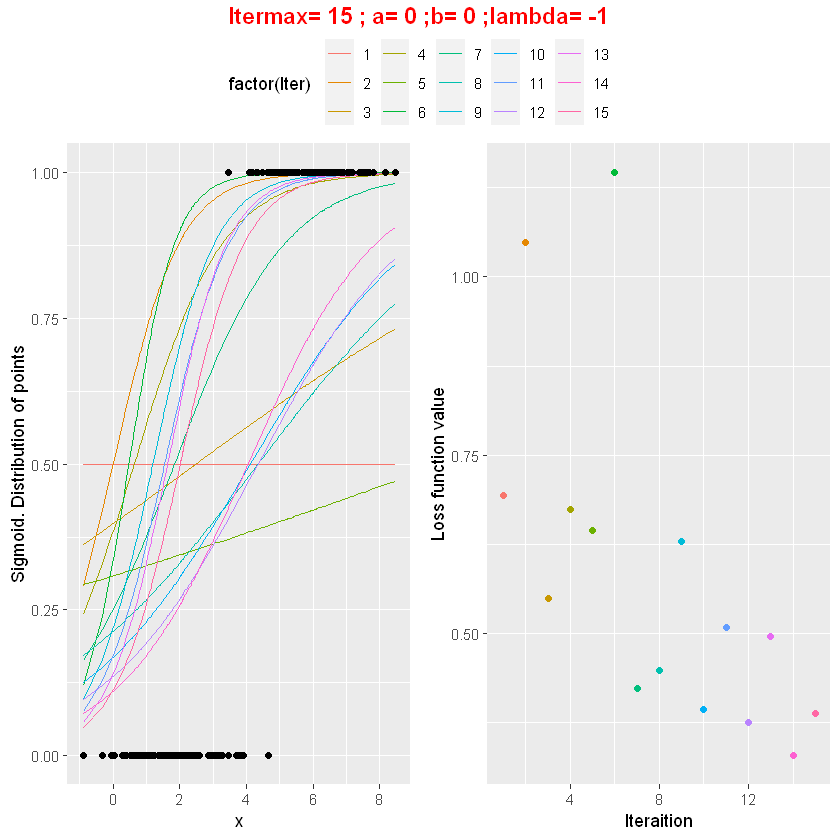

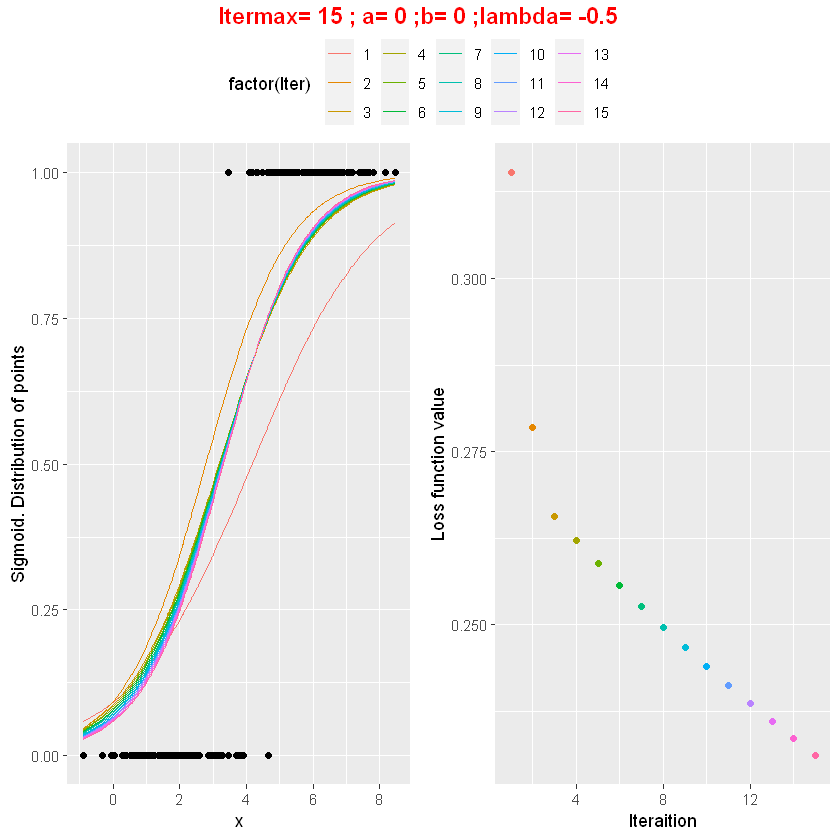

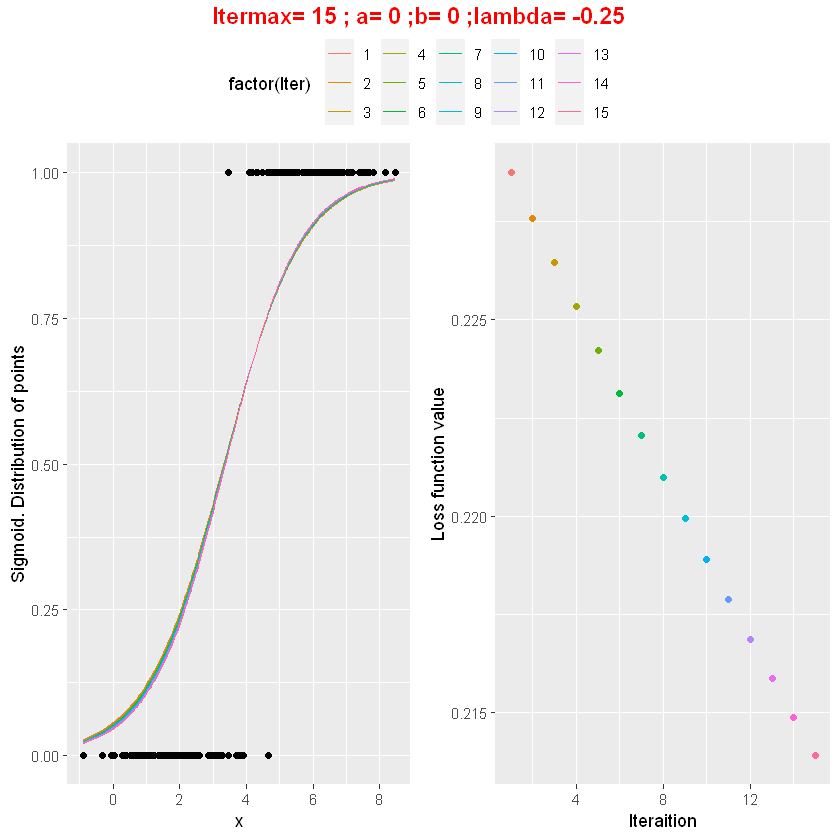

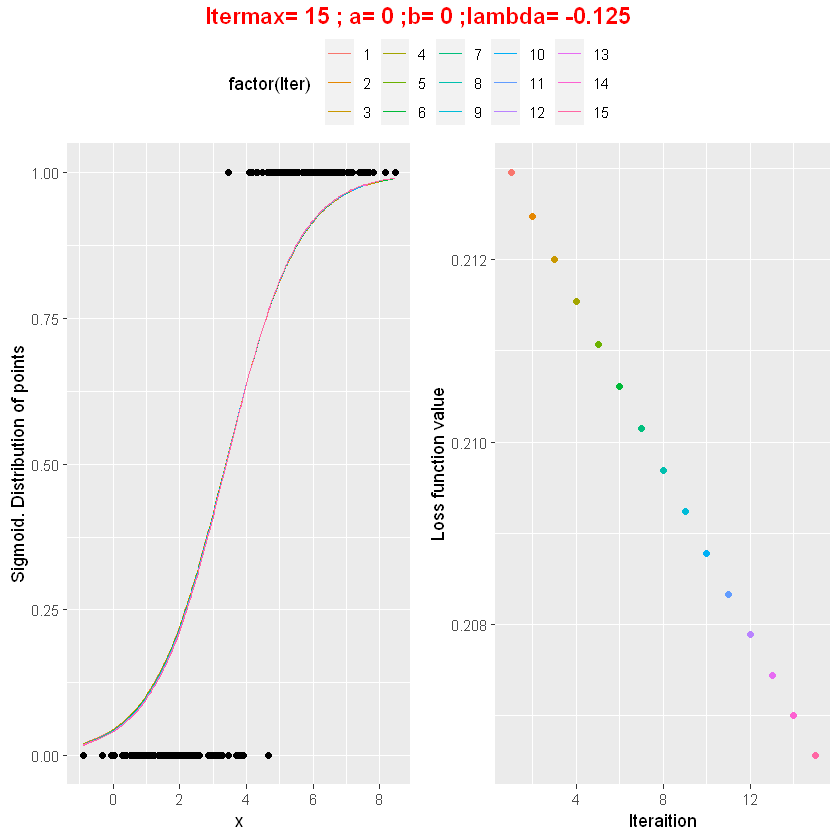

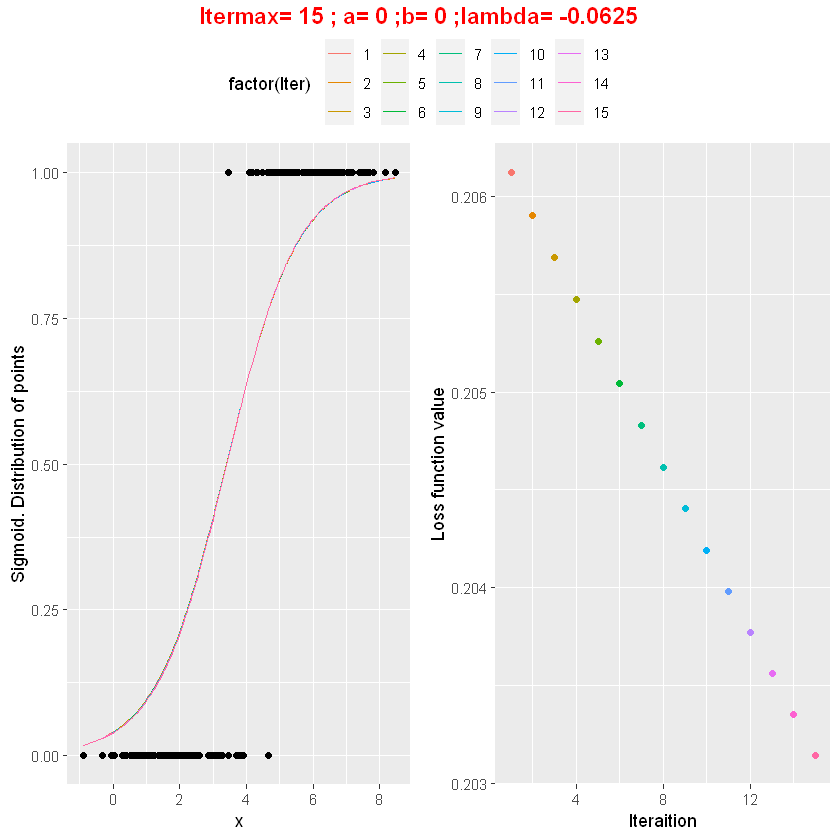

In [9]:
a <- 0
b <- 0
lambda <- c(-1, -0.5, -0.25, -0.125, -0.0625)
comparison(x =x, y = y, coefs = c(a,b), itermax = 15, lambda = lambda)


Vemos que cuanto más pequeño es lambda, menos tarda en estabilizarse la regresión logística.

Hagamos variar el coeficiente a:

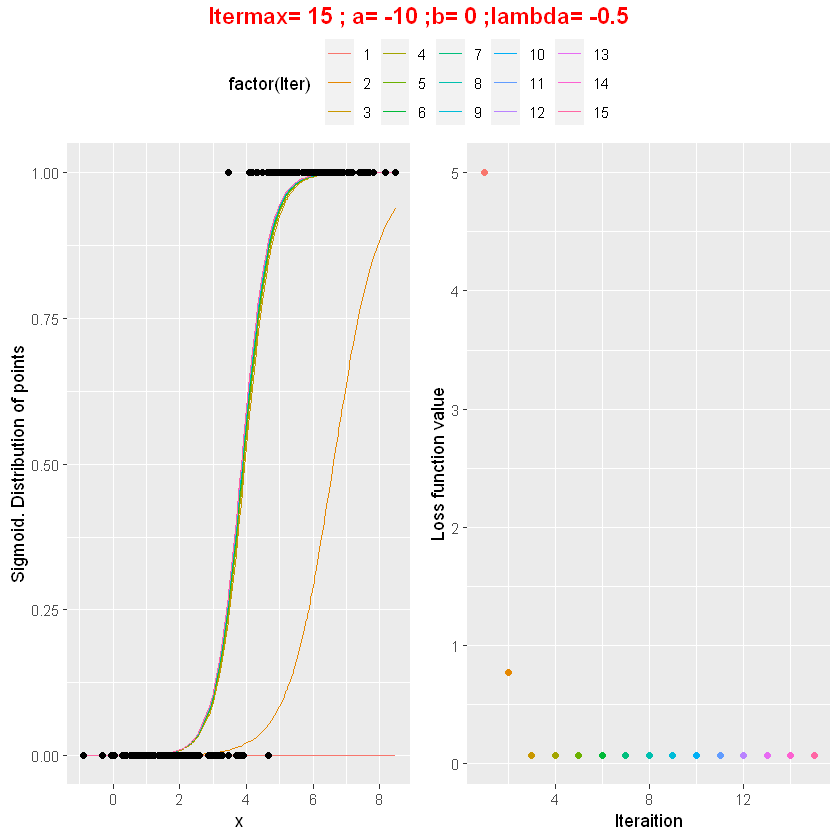

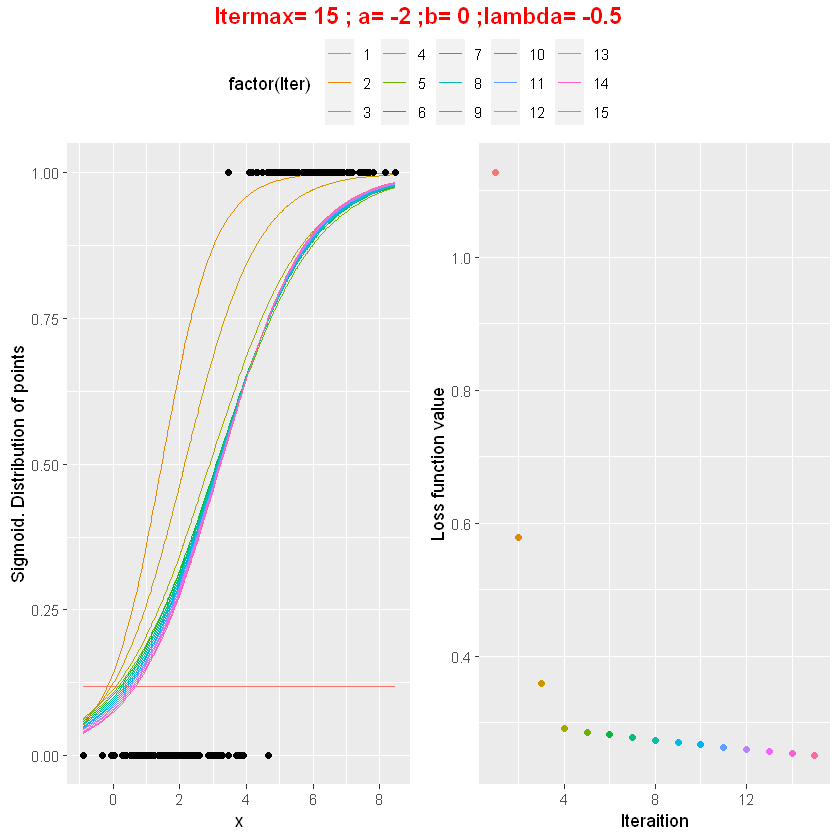

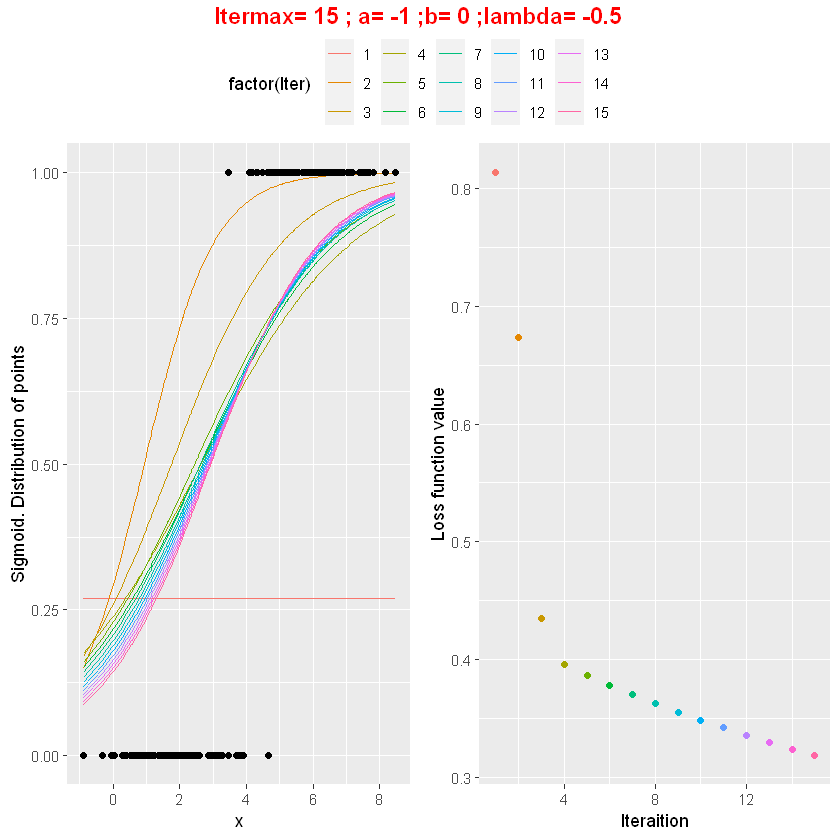

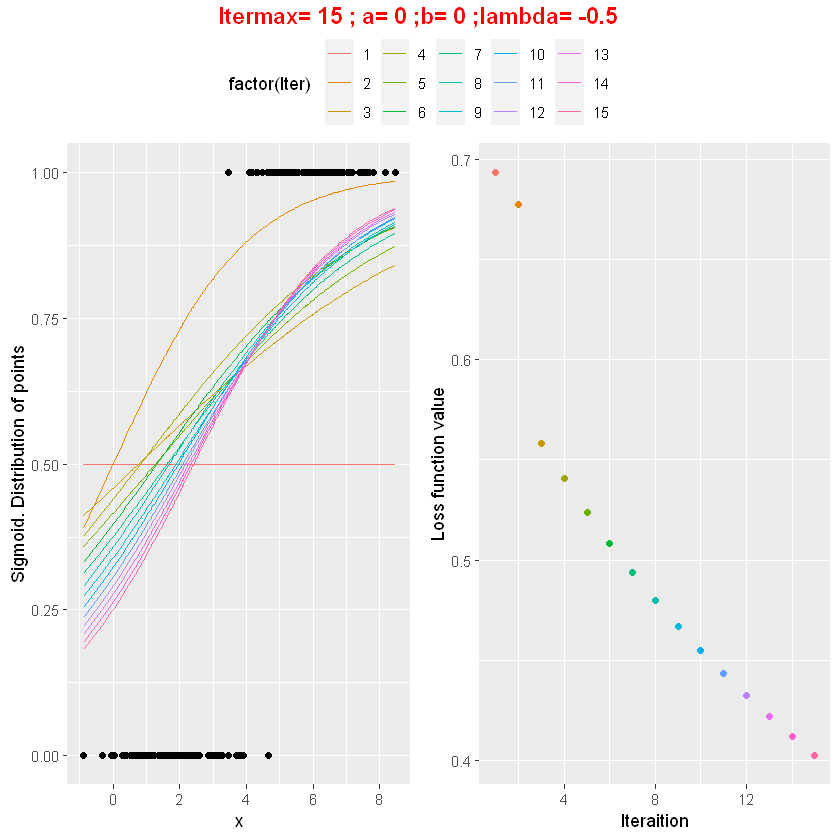

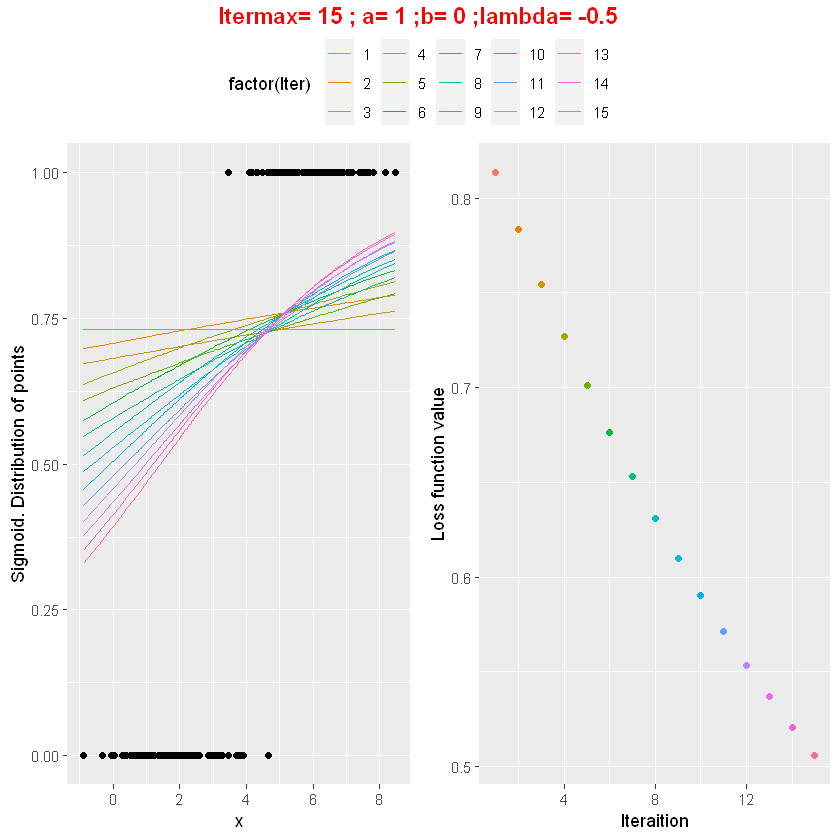

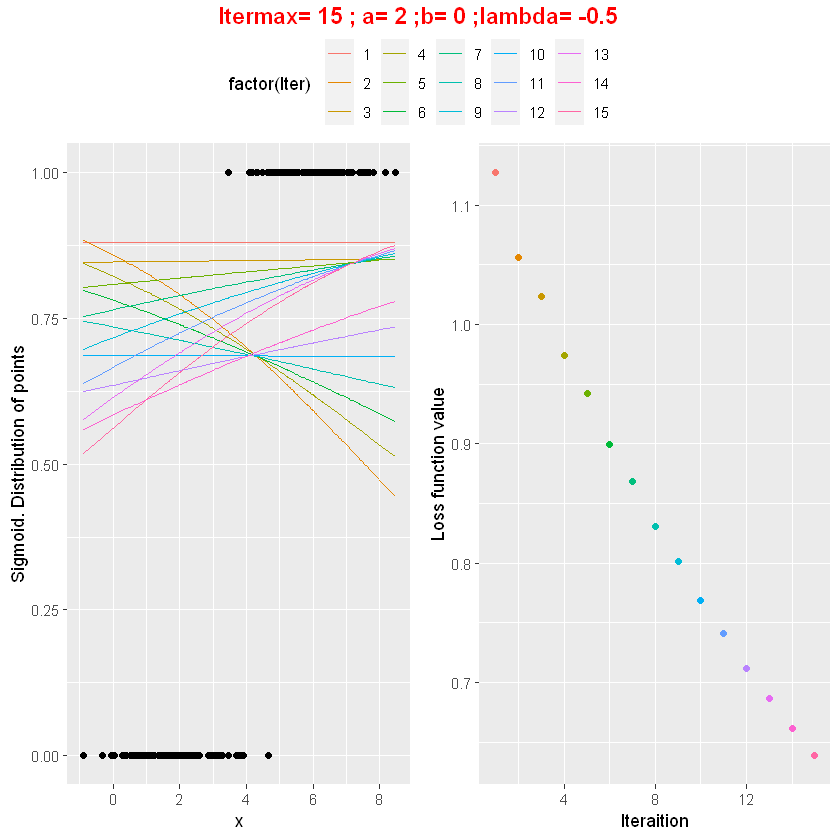

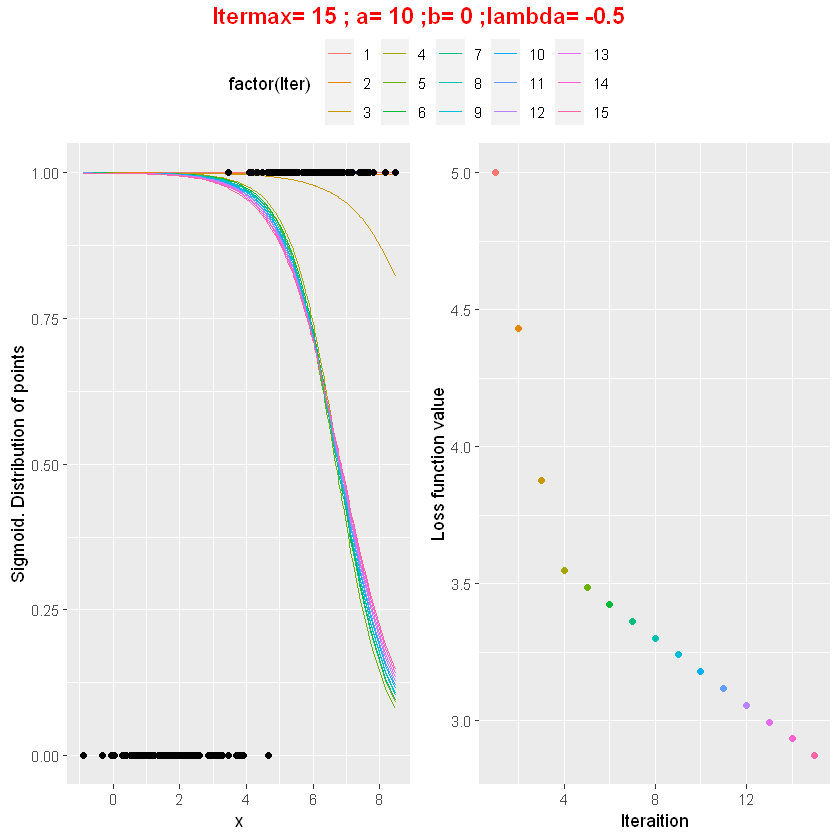

In [10]:
a_list <- c(-10,-2,-1,0,1,2,10)
b <- 0
for (a in a_list){
comparison(x = x, y = y, coefs = c(a, b), itermax = 15, lambda = -0.5)
}


Si ponemos un a demasiado grande, la regresión logística se da la vuelta, pero la función de error continúa minimizándose (no aumenta su valor) ¿Cómo puede ser esto?

Hagamos variar el valor b:

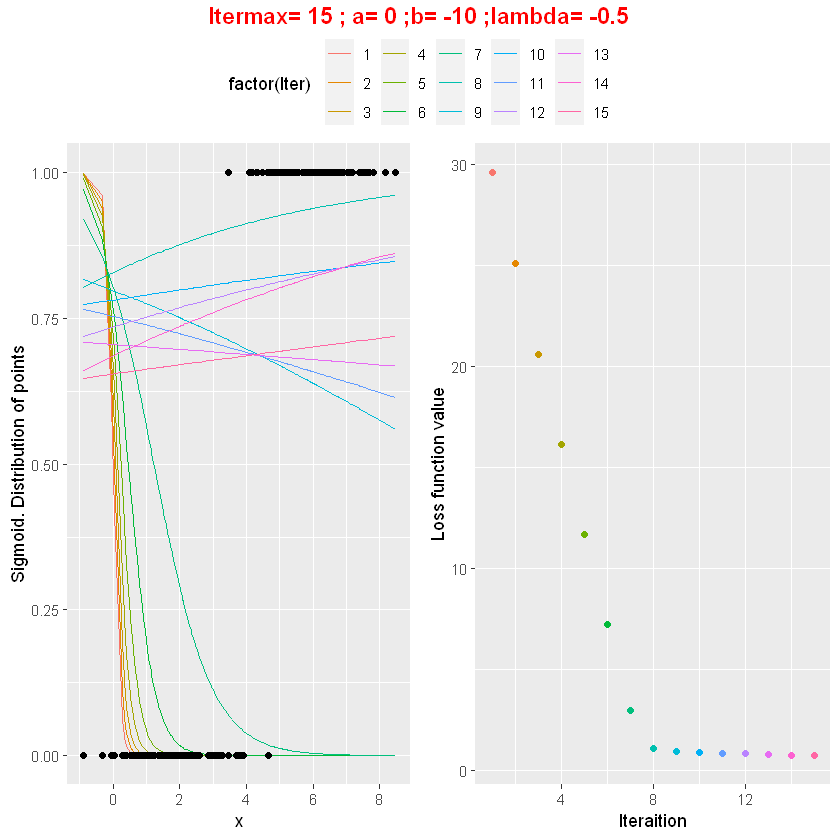

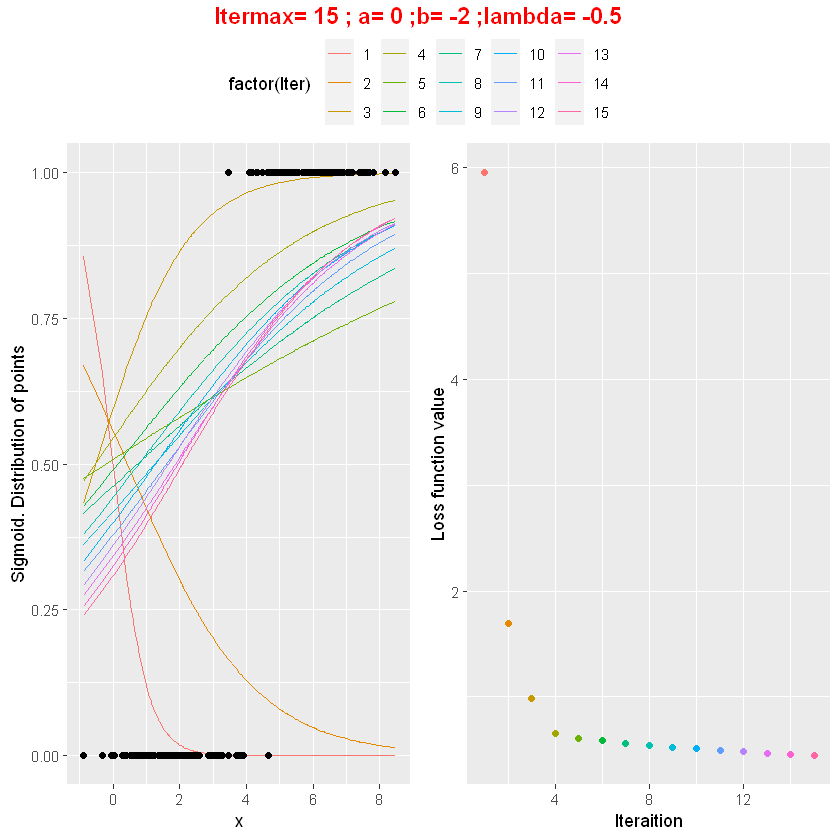

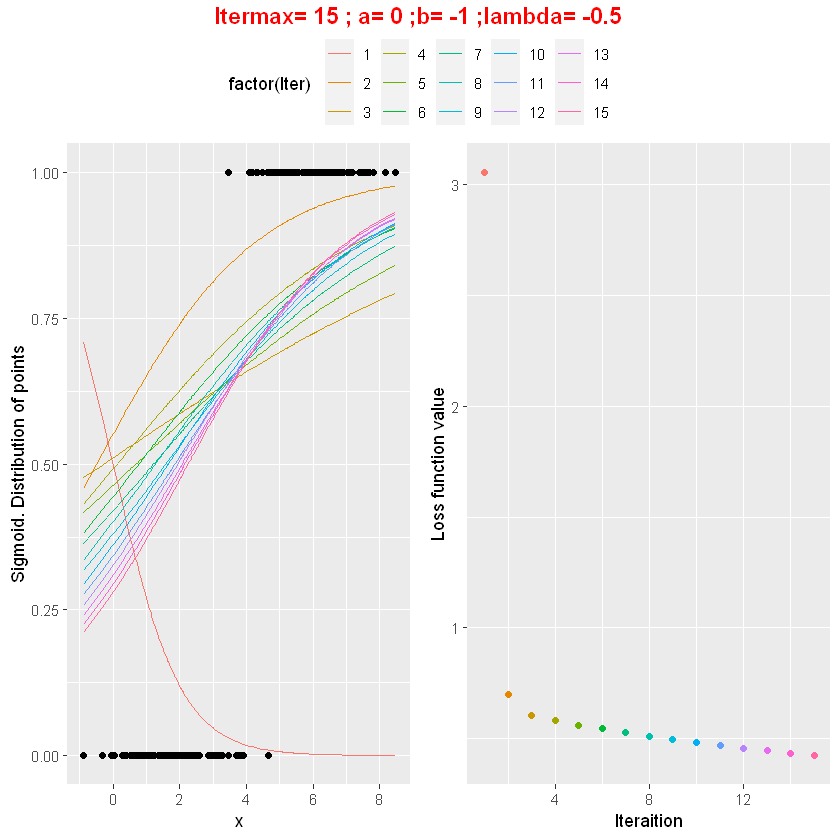

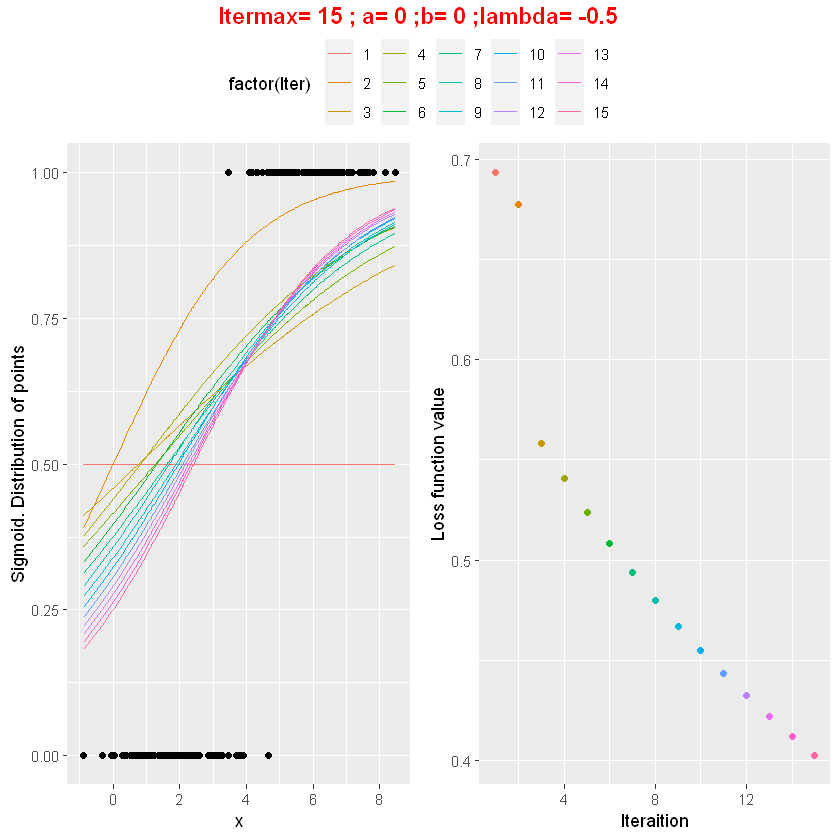

Warning message:
"Removed 12 rows containing missing values (geom_point)."

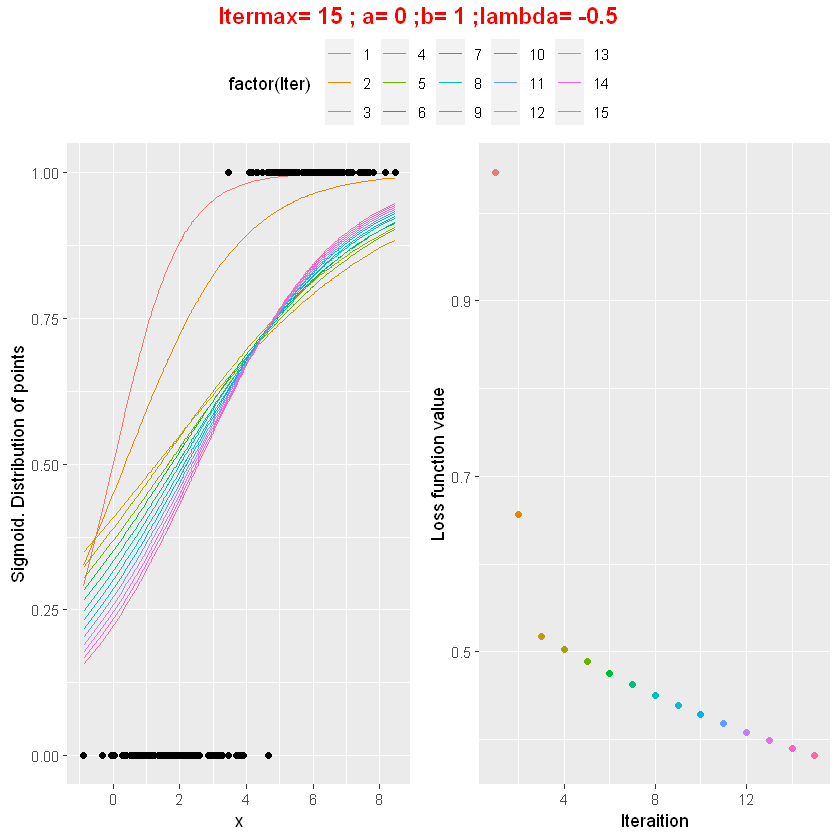

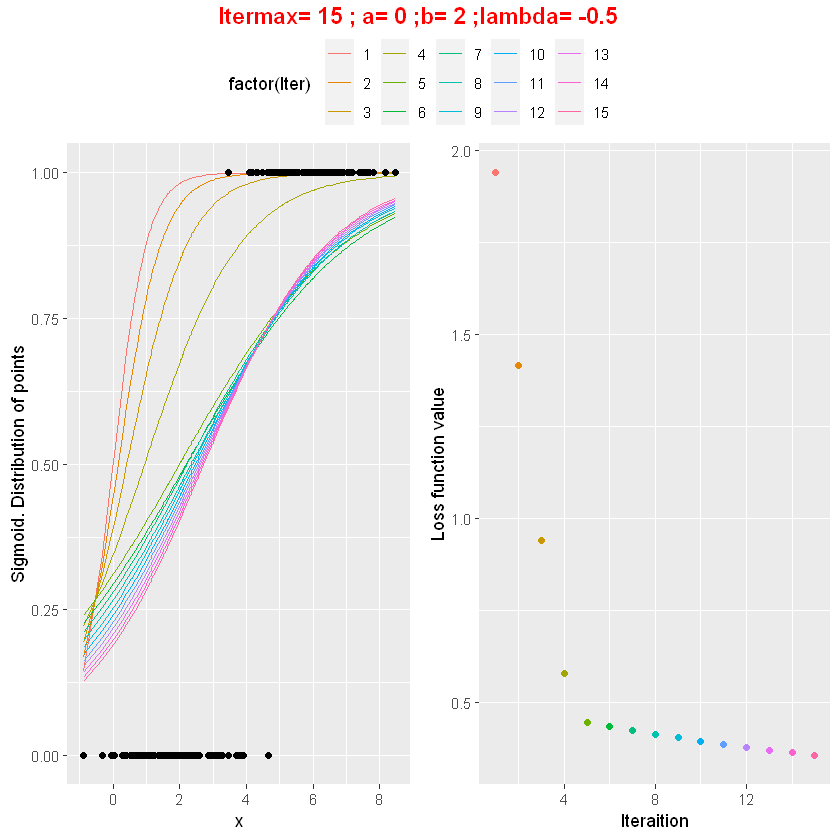

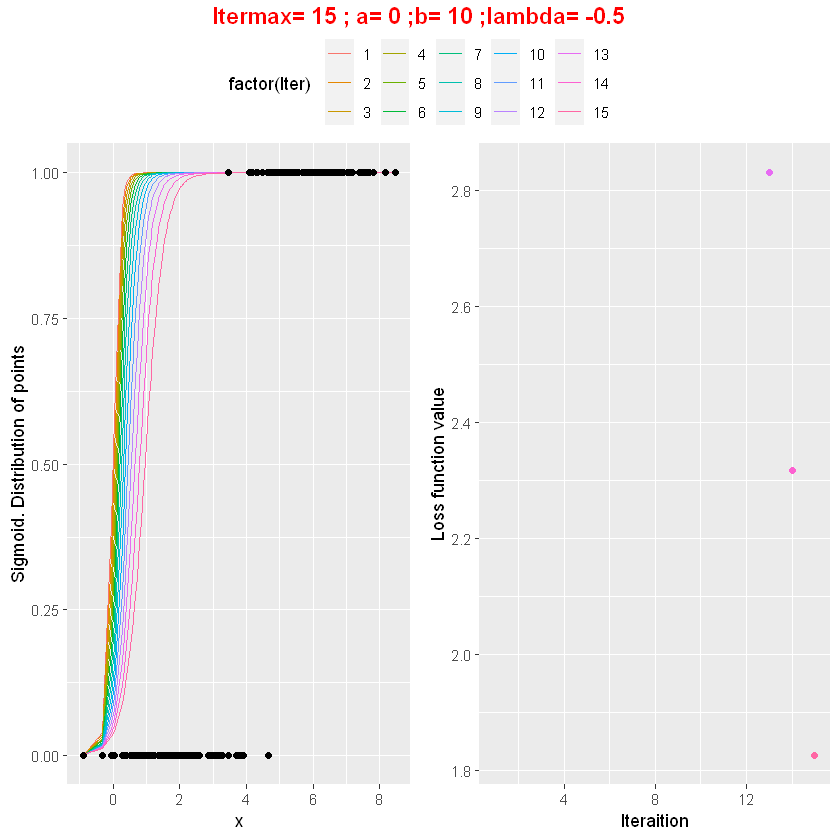

In [11]:
b_list <- c(-10,-2,-1,0,1,2,10)
a <- 0
for (b in b_list){
comparison(x = x, y = y, coefs = c(a, b), itermax = 15, lambda = -0.5)
}


Para b muy pequeño, no tiene sentido la regresión logística. 